## 1.Data analysis - Malta Airbnb

In [2]:
## Import libraries
import pandas as pd 
import numpy as np

import csv

#Natural Language processing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Data visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## Load data
## http://insideairbnb.com/get-the-data.html 28 DEC 2021 LAST COMPILED
## https://github.com/Lukastuong123/Python/blob/master/Project-%20Airbnb%20(Python-%20Interactive%20Map%2C%20Natural%20Language%20Processing%2C%20Comparative%20Study%2C%20Regression)/Project.%20AirBnB%20Part%20B%20(Python-%20Interactive%20Map%2C%20Natural%20Language%20Processing)%20.ipynb

listings = pd.read_csv('./Data/listings.csv')
reviews = pd.read_csv('./Data/reviews.csv')
listings_summary = pd.read_csv('./Data/listings_summary.csv')

In [3]:
## Check detailed listings dataframe
listings.head()

,id,listing_url,scrape_id,last_searched,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month
0,53988243,https://www.airbnb.com/rooms/53988243,20211228232058,2021-12-28,2021-12-30,Brand-new shared one-bedroom apartment (only g...,In the middle of San Julian and Sliema. Bus st...,NaN,https://a0.muscache.com/pictures/d5fd9439-76bc...,49911004,...,0,0,1,MT01253,San Gwann,NaN,NaN,NaN,NaN,NaN
1,39695529,https://www.airbnb.com/rooms/39695529,20211228232058,2021-12-28,2021-12-30,modern apartment,the apartment is very big and modern and its i...,mini market in 2 min walk <br />super market 1...,https://a0.muscache.com/pictures/e41a92fc-c010...,217804068,...,1,1,0,MT01310,Zejtun,NaN,NaN,NaN,NaN,NaN
2,11579194,https://www.airbnb.com/rooms/11579194,20211228232058,2021-12-28,2021-12-30,The Residence 03 - University area,The Residence is located within the upmarket H...,The Residence is located within the upmarket H...,https://a0.muscache.com/pictures/d7d822dd-3031...,57084556,...,0,7,0,MT01253,San Gwann,NaN,NaN,NaN,NaN,0.19
3,23363846,https://www.airbnb.com/rooms/23363846,20211228232058,2021-12-28,2021-12-30,"Full Air-conditioned, 2 Bedroom Apt.",An 80sqm 2 bedroom apartment in the South of M...,The apartment on top lives an Sicilian family....,https://a0.muscache.com/pictures/bca21e3d-f0e5...,31383964,...,1,0,0,MT01310,Zejtun,NaN,NaN,NaN,NaN,0.97
4,33903128,https://www.airbnb.com/rooms/33903128,20211228232058,2021-12-28,2021-12-30,Village Knights B&B - Valletta Room,"A luxury, authentic, house of character in the...","Just a 4 min walk up the road to the centre, o...",https://a0.muscache.com/pictures/94dc5710-ec97...,239349288,...,0,1,0,MT01407,Zebbug (Malta),NaN,NaN,NaN,NaN,NaN


In [223]:
## Check reviews dataframe
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,637763,2173360,2012-09-02,3250724,Naoufal,My stay here was à lot better than I expected! It was in one word wonderful. The house is very big and spacious. It'...
1,637763,2490468,2012-10-02,2678469,Joey,This was an absolutely delightful place to stay and the hostess was incredibly welcoming and friendly. There are two...
2,637763,2597919,2012-10-13,3679703,Katerina,My boyfriend and I stayed at Stefania's place in October and it was absolutely great! Stefania is an amazing host an...
3,637763,4075716,2013-04-08,4180801,Philippe,very nice place to visit Malta. The house is comfortable and tastefully decorated. All to be comfortable. Stefania i...
4,637763,4178698,2013-04-16,4902150,Roman,War alles gut bei Stefania. Sehr freundlich uns sauber. Wie es sein sollte.\r<br/>Das Bluehouse ist mit den unzählig...


In [5]:
## Check columns related to reviews from listings df
print([col for col in listings.columns if 'review' in col])

['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [ ]:
## Check information about data type 

print(listings.info())
## 8406 unique listings ID

print(reviews.info())
## 173180 comments

In [7]:
## Check for duplicates in listingd id
print("Number of unique listings id is:", listings.id.nunique())

## Unique number of host_id - 3678
print("Number of unique hosts id is:", listings.host_id.nunique())

## There are 8406 properties belonging to 3678 owners.

Number of unique listings id is: 8406
Number of unique hosts id is: 3678


In [8]:
## Select columns to further analyse - reviews_scores_rating was checked by looking at airbnb website
necessary_columns = ['id', 'name', 'host_id',  'host_since', 'host_is_superhost', 'host_response_rate', 
                     'room_type', 'accommodates', 'minimum_nights', 'first_review', 'last_review', "price",
                     'review_scores_rating', 'calculated_host_listings_count', 'region_name', 'number_of_reviews']

## Subset df
listings2 = listings.loc[:, listings.columns.isin(necessary_columns)]

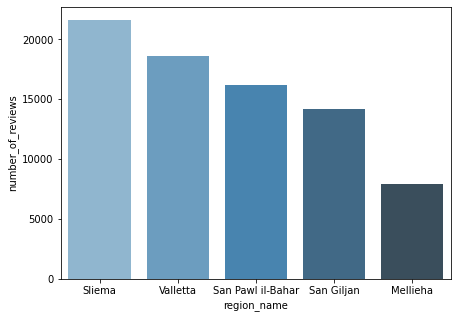

In [185]:
region_reviews = listings2.groupby(['region_name']).agg({'number_of_reviews': pd.Series.sum})
#room_types_reviews = listings.groupby(['room_type']).size().sort_values(ascending=False)
region_reviews = region_reviews.reset_index()
region_reviews.sort_values("number_of_reviews", ascending=False, inplace=True)
#room_types_reviews.info()

plt.figure(figsize=(7,5))
p1 = sns.barplot(x = 'region_name', y = "number_of_reviews", data = region_reviews.head(5), palette="Blues_d")

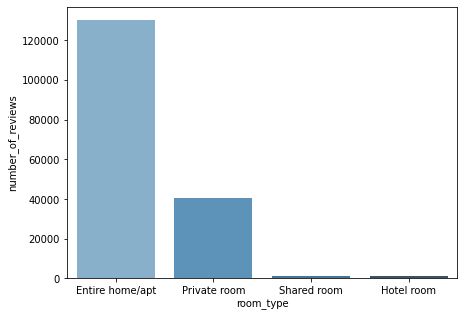

In [68]:
room_types_reviews = listings2.groupby(['room_type']).agg({'number_of_reviews': pd.Series.sum})
#room_types_reviews = listings.groupby(['room_type']).size().sort_values(ascending=False)
room_types_reviews = room_types_reviews.reset_index()
room_types_reviews.sort_values("number_of_reviews", ascending=False, inplace=True)
#room_types_reviews.info()

plt.figure(figsize=(7,5))
p1 = sns.barplot(x = 'room_type', y = "number_of_reviews", data = room_types_reviews, palette="Blues_d")


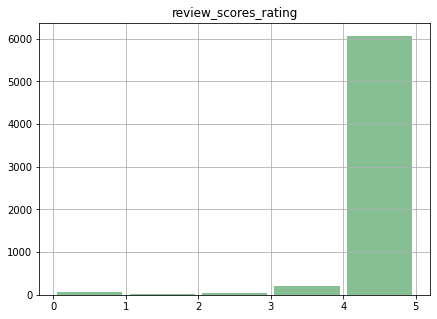

In [219]:
## Number of reviews per scores
ax = listings.hist(column='review_scores_rating', bins=5, grid=True, figsize=(7,5), color='#86bf91', rwidth=0.9)


## Reviews analysis

In [19]:
## Take a look at reviews
reviews.comments.values[5]

"Brilliant! While on vacation using Airbnb, I am looking for a clean comfortable room, good location and nice host. Stefania's triumphs in all three categories. Location can not be any better. It is 5-6 minutes walk of both sides of Sliema's water front; Sliema Ferry on one side is where all your bus and sea-bound tours start from (as well as the ferry to Valleta) and on the north side, border with San Julian, where there are even more eateries and night life. Rooms are large and spotlessly clean and bathrooms are newly remodeled. House is a typical local house tucked in a small, quiet residential area, that will remain quiet even in high tourism season (while being minutes away from the hassle and bustle). Upper floor provides the guest with total privacy and even their own small kitchen. Stefania is a gracious and superb host, and will sure take extremely good care of you. Highly recommended! Thanks Stefania for superb hospitality."

In [189]:
print(len(reviews.comments.values[5])) ## 946 words

946


In [3]:
## Convert comments to string
reviews['comments'] = reviews['comments'].astype('string') 

In [4]:
reviews['words'] = reviews['comments'].str.split().str.len()
reviews.drop(reviews[reviews.words<1].index, inplace=True)
print(reviews.words.mean())

52.10278867429648


In [33]:
#reviews = pd.read_csv('./Data/reviews.csv')

In [5]:
#reviews = reviews[reviews['comments'].notna()]
reviews.drop(reviews[reviews.words<1].index, inplace=True)

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

## List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dianaionascu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
## Text cleaning - 'comments' column

#1. Remove empty comments 
reviews = reviews[reviews['comments'].notnull()]

#2. Convert to lower case
reviews['comments'] = reviews['comments'].str.lower()

#3. Remove numbers
reviews['comments'] = reviews['comments'].str.replace('\d+', '', regex = True)

## 4. Remove punctuation (regex method)
reviews['comments'] = reviews['comments'].str.replace("[^\w\s]", "", regex = True)

## 5. Replace double spaces with single space
reviews['comments'] = reviews['comments'].str.replace('\s+', ' ', regex = True)

## 6. Remove comments with only one letter
reviews['string_count'] = reviews['comments'].str.len()
reviews.drop(reviews[reviews.string_count<2].index, inplace=True)

## 8. Use nltk library to remove unecessary information (stopwords)
reviews.comments = reviews.comments.apply(lambda x: " ".join([i for i in x.split()
                                            if i not in (stopwords)]))

## 7. Tokenize column
reviews['tokenized_review'] = reviews.apply(lambda row: nltk.word_tokenize(row['comments']), axis=1)

In [148]:
## example
'Malta' == 'malta'

False

In [8]:
## Stemming
stemmer_ps = nltk.PorterStemmer()

In [131]:
print(stemmer_ps.stem('eat'))
print(stemmer_ps.stem('eating'))
print(stemmer_ps.stem('eaten'))

eat
eat
eaten


In [9]:
## select relevant columns
reviews_summary = reviews[['id', 'comments', 'words', 'string_count', 'tokenized_review']]
columns = ['id', 'comments', 'words', 'string_count', 'tokenized_review']
reviews_summary = reviews_summary.reindex(columns=columns)

## widen the column length
pd.set_option('display.max_colwidth', 100)

## preview
reviews_summary.head()

,id,comments,words,string_count,tokenized_review
0,2173360,stay à lot better expected one word wonderful house big spacious also nicely decorated location ...,106,530,"[stay, à, lot, better, expected, one, word, wonderful, house, big, spacious, also, nicely, decor..."
1,2490468,absolutely delightful place stay hostess incredibly welcoming friendly two amplesized bedrooms u...,61,376,"[absolutely, delightful, place, stay, hostess, incredibly, welcoming, friendly, two, amplesized,..."
2,2597919,boyfriend stayed stefanias place october absolutely great stefania amazing host always made sure...,88,463,"[boyfriend, stayed, stefanias, place, october, absolutely, great, stefania, amazing, host, alway..."
3,4075716,nice place visit malta house comfortable tastefully decorated comfortable stefania great host ev...,37,212,"[nice, place, visit, malta, house, comfortable, tastefully, decorated, comfortable, stefania, gr..."
4,4178698,war alles gut bei stefania sehr freundlich uns sauber wie es sein sollte brdas bluehouse ist mit...,33,205,"[war, alles, gut, bei, stefania, sehr, freundlich, uns, sauber, wie, es, sein, sollte, brdas, bl..."


In [151]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
## stemming function
def stemming(tokenized_text):
    text = [stemmer_ps.stem(word) for word in tokenized_text]
    return text

reviews_summary['review_stemmed'] = reviews_summary['tokenized_review'].apply(lambda x: stemming(x))

reviews_summary.head()

,id,comments,words,string_count,tokenized_review,review_stemmed
0,2173360,stay à lot better expected one word wonderful house big spacious also nicely decorated location ...,106,530,"[stay, à, lot, better, expected, one, word, wonderful, house, big, spacious, also, nicely, decor...","[stay, à, lot, better, expect, one, word, wonder, hous, big, spaciou, also, nice, decor, locat, ..."
1,2490468,absolutely delightful place stay hostess incredibly welcoming friendly two amplesized bedrooms u...,61,376,"[absolutely, delightful, place, stay, hostess, incredibly, welcoming, friendly, two, amplesized,...","[absolut, delight, place, stay, hostess, incred, welcom, friendli, two, amples, bedroom, upstair..."
2,2597919,boyfriend stayed stefanias place october absolutely great stefania amazing host always made sure...,88,463,"[boyfriend, stayed, stefanias, place, october, absolutely, great, stefania, amazing, host, alway...","[boyfriend, stay, stefania, place, octob, absolut, great, stefania, amaz, host, alway, made, sur..."
3,4075716,nice place visit malta house comfortable tastefully decorated comfortable stefania great host ev...,37,212,"[nice, place, visit, malta, house, comfortable, tastefully, decorated, comfortable, stefania, gr...","[nice, place, visit, malta, hous, comfort, tast, decor, comfort, stefania, great, host, everyth,..."
4,4178698,war alles gut bei stefania sehr freundlich uns sauber wie es sein sollte brdas bluehouse ist mit...,33,205,"[war, alles, gut, bei, stefania, sehr, freundlich, uns, sauber, wie, es, sein, sollte, brdas, bl...","[war, all, gut, bei, stefania, sehr, freundlich, un, sauber, wie, es, sein, sollt, brda, bluehou..."


In [11]:
## lemmatize
lemmatizer_wn = nltk.WordNetLemmatizer()

print(stemmer_ps.stem('meanness'))
print(stemmer_ps.stem('meaning'))

mean
mean


In [136]:
print(lemmatizer_wn.lemmatize('meanness'))
print(lemmatizer_wn.lemmatize('meaning'))

meanness
meaning


In [12]:
## lemmatize function
def lemmatizing(tokenized_text):
     text = [lemmatizer_wn.lemmatize(word) for word in tokenized_text]
     return text

reviews_summary['review_lemmatized'] = reviews_summary['tokenized_review'].apply(lambda x: lemmatizing(x))

reviews_summary[['comments', 'review_lemmatized']].head()

,comments,review_lemmatized
0,stay à lot better expected one word wonderful house big spacious also nicely decorated location ...,"[stay, à, lot, better, expected, one, word, wonderful, house, big, spacious, also, nicely, decor..."
1,absolutely delightful place stay hostess incredibly welcoming friendly two amplesized bedrooms u...,"[absolutely, delightful, place, stay, hostess, incredibly, welcoming, friendly, two, amplesized,..."
2,boyfriend stayed stefanias place october absolutely great stefania amazing host always made sure...,"[boyfriend, stayed, stefanias, place, october, absolutely, great, stefania, amazing, host, alway..."
3,nice place visit malta house comfortable tastefully decorated comfortable stefania great host ev...,"[nice, place, visit, malta, house, comfortable, tastefully, decorated, comfortable, stefania, gr..."
4,war alles gut bei stefania sehr freundlich uns sauber wie es sein sollte brdas bluehouse ist mit...,"[war, alles, gut, bei, stefania, sehr, freundlich, un, sauber, wie, e, sein, sollte, brdas, blue..."


In [50]:
reviews.comments[5]

'brilliant vacation using airbnb looking clean comfortable room good location nice host stefanias triumphs three categories location better minutes walk sides sliemas water front sliema ferry one side bus seabound tours start well ferry valleta north side border san julian even eateries night life rooms large spotlessly clean bathrooms newly remodeled house typical local house tucked small quiet residential area remain quiet even high tourism season minutes away hassle bustle upper floor provides guest total privacy even small kitchen stefania gracious superb host sure take extremely good care highly recommended thanks stefania superb hospitality'

In [121]:
text = reviews.comments[5]
#print(text) nu era nicio diferenta ca text
print(lemmatizer_wn.lemmatize(text))

brilliant vacation using airbnb looking clean comfortable room good location nice host stefanias triumphs three categories location better minutes walk sides sliemas water front sliema ferry one side bus seabound tours start well ferry valleta north side border san julian even eateries night life rooms large spotlessly clean bathrooms newly remodeled house typical local house tucked small quiet residential area remain quiet even high tourism season minutes away hassle bustle upper floor provides guest total privacy even small kitchen stefania gracious superb host sure take extremely good care highly recommended thanks stefania superb hospitality


In [13]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dianaionascu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
## Lemmatize with POS tag
from nltk.corpus import wordnet
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    #nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    
    nltk_tagged = nltk.pos_tag(sentence)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    #tuple of (token, wordnet_tag)
    #wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), sentence)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer_wn.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)



# Lemmatizing
reviews_summary['review_lemmatized_pos'] = reviews_summary['tokenized_review'].apply(lambda x: lemmatize_sentence(x))
reviews_summary[['review_lemmatized', 'review_lemmatized_pos']].head(10)

,review_lemmatized,review_lemmatized_pos
0,"[stay, à, lot, better, expected, one, word, wonderful, house, big, spacious, also, nicely, decor...",stay à lot well expect one word wonderful house big spacious also nicely decorate location perfe...
1,"[absolutely, delightful, place, stay, hostess, incredibly, welcoming, friendly, two, amplesized,...",absolutely delightful place stay hostess incredibly welcome friendly two amplesized bedroom upst...
2,"[boyfriend, stayed, stefanias, place, october, absolutely, great, stefania, amazing, host, alway...",boyfriend stay stefanias place october absolutely great stefania amaze host always make sure eve...
3,"[nice, place, visit, malta, house, comfortable, tastefully, decorated, comfortable, stefania, gr...",nice place visit malta house comfortable tastefully decorate comfortable stefania great host eve...
4,"[war, alles, gut, bei, stefania, sehr, freundlich, un, sauber, wie, e, sein, sollte, brdas, blue...",war alles gut bei stefania sehr freundlich uns sauber wie e sein sollte brdas bluehouse ist mit ...
5,"[brilliant, vacation, using, airbnb, looking, clean, comfortable, room, good, location, nice, ho...",brilliant vacation use airbnb look clean comfortable room good location nice host stefanias triu...
6,"[stefania, lovely, host, welcomed, u, relaxed, warm, environment, mention, breakfast, treat, blu...",stefania lovely host welcome us relax warm environment mention breakfast treat blu house authent...
7,"[stefania, friendly, generous, hostess, house, accommodating, spacious, room, perfect, u, stefan...",stefania friendly generous hostess house accommodate spacious room perfect us stefania willing a...
8,"[youre, planning, stay, sliemagzirast, julian, area, thats, place, havent, seen, better, room, a...",youre plan stay sliemagzirast julian area thats place havent see well room area especially one b...
9,"[wonderful, experience, malta, really, reason, stay, anywhere, else, bluhouse, availablethis, ol...",wonderful experience malta really reason stay anywhere else bluhouse availablethis old maltese h...


In [17]:
from nltk import sent_tokenize
nltk.download('punkt')

## top words used in reviews
from nltk.probability import FreqDist

## convert to list
feedback_list = reviews_summary.review_lemmatized_pos.to_list()

## convert list into string
feedback_list2 = ' '.join(feedback_list) 

## tokenize the string
tokens = nltk.word_tokenize(feedback_list2) 

## words frequency
wordsFrequency = FreqDist(tokens) 
#print(wordsFrequency.most_common(10))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianaionascu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [164]:
## Display the result in a nicer format
wordsFreq_df = pd.DataFrame(wordsFrequency.most_common(10),
                                     columns=["Word", "Frequency"])
wordsFreq_df.head(10)

,Word,Frequency
0,apartment,69675
1,stay,67995
2,great,66953
3,place,62957
4,de,53621
5,host,46333
6,location,43613
7,us,42143
8,nice,40993
9,clean,38378


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

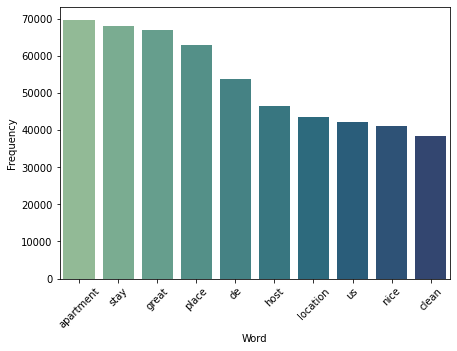

In [165]:
## Plot
wordsFreq_df.sort_values("Frequency", ascending=False, inplace=True)
#room_types_reviews.info()

plt.figure(figsize=(7,5))
p1 = sns.barplot(x = 'Word', y = "Frequency", data = wordsFreq_df, palette="crest")
plt.setp(p1.get_xticklabels(), rotation=45)

In [ ]:
## Plot
top_10 = wordsFrequency.most_common(5)
top_10 = pd.Series(dict(wordsFrequency))
fig, ax =plt.subplots(figsize = (10,10))

## Seaborn
plot_fig = sns.barplot(x = top_10.index, y = top_10.values, ax=ax)
plt.xticks(rotation=30)

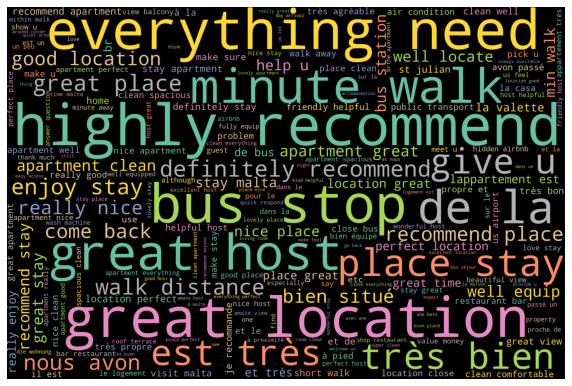

In [167]:
## Wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2').generate(feedback_list2)

plt.figure(figsize= (10,10))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()


In [15]:
## Detect languages

## Convert comments to string
reviews_summary['comments'] = reviews_summary['comments'].astype('string') 

# Langdetect library
import langdetect
from langdetect import detect
#reviews['language'] = reviews['comments'].apply(lambda x: langdetect.detect(x))

## Catch the erros when the lang cannot be detected
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

reviews_summary['language'] = reviews_summary['comments'].apply(lambda x: det(x))

reviews_summary['language'].value_counts().head(5) ##ro 1014

en    124407
fr     22435
it      6457
de      5430
es      3644
Name: language, dtype: int64

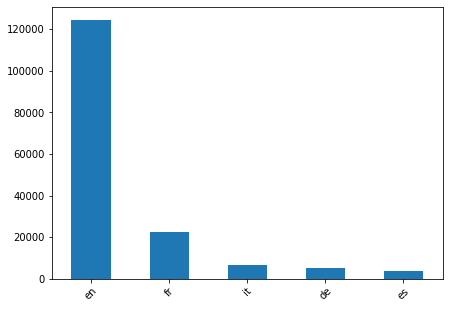

In [169]:
## Plot
plt.figure(figsize=(7,5))
reviews_summary['language'].value_counts().head(5).plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show() 


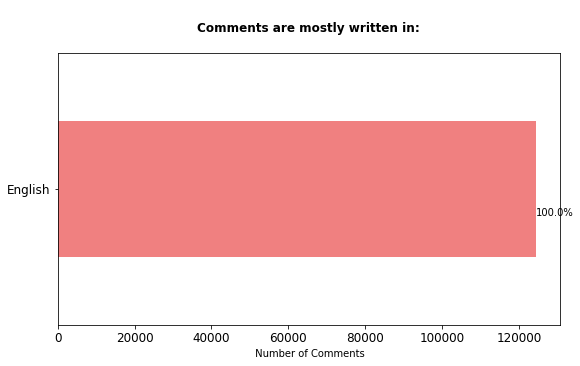

In [11]:
## plot in a nicer format
ax = reviews_summary.language.value_counts().head(5).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12)

ax.set_title("\nComments are mostly written in:\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'Italian', 'German', 'Spanish'])
#ax.set_yticklabels(['English'])

totals = []
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')


# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02))

# invert for largest on top 
ax.invert_yaxis()

In [115]:
ro_reviews = reviews_summary[reviews_summary.language == 'ro'] ## nothing in Romanian here. few words used in comments to asses right language
fr_reviews = reviews_summary[reviews_summary.language == 'fr'] ## most of them were correct, a few in english at first sight

In [194]:
ro_reviews['words'] = ro_reviews['comments'].str.split().str.len()
print(ro_reviews.words.mean())

3.601577909270217


<ipython-input-194-bf235775f899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ro_reviews['Words'] = ro_reviews['comments'].str.split().str.len()


In [18]:
## select only english comments
reviews_en = reviews_summary[reviews_summary['language'] == 'en']

## convert to list
feedback_list = reviews_en.review_lemmatized_pos.to_list()

## convert list into string
feedback_list2 = ' '.join(feedback_list) 

## tokenize the string
tokens = nltk.word_tokenize(feedback_list2) 

## words frequency
wordsFrequency = FreqDist(tokens) 
print(wordsFrequency.most_common(10))

[('apartment', 67693), ('stay', 67244), ('great', 65733), ('place', 60586), ('host', 44661), ('location', 42194), ('us', 41827), ('nice', 39224), ('clean', 37780), ('recommend', 36565)]


In [171]:
## Display the result in a nicer format
wordsFreq_df = pd.DataFrame(wordsFrequency.most_common(10),
                                     columns=["Word", "Frequency"])
wordsFreq_df.head(10)

,Word,Frequency
0,apartment,67698
1,stay,67243
2,great,65715
3,place,60593
4,host,44656
5,location,42198
6,us,41839
7,nice,39239
8,clean,37789
9,recommend,36561


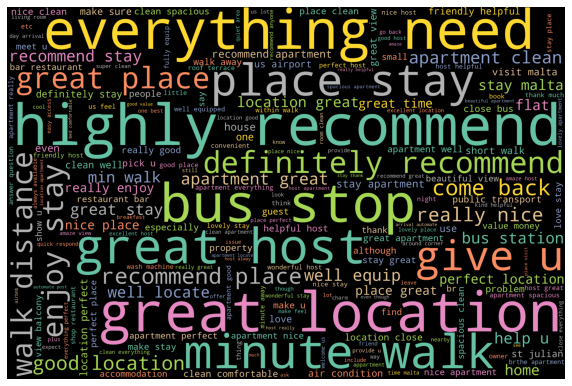

In [172]:
## Wordcloud
wordcloud_en = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2').generate(feedback_list2)

plt.figure(figsize= (10,10))
plt.imshow(wordcloud_en)

plt.axis("off")
plt.show()

## Sentiment analysis

In [12]:
## Sentiment anaylsis columns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dianaionascu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [180]:
reviews_en.comments[6]

'stefania lovely host welcomed us relaxed warm environment mention breakfast treats blu house authentic character tall ceilings old world charm wouldnt hesitate recommend blu house anyone going malta would definitely stay stefania went way make stay although short lovely bonus child friendly environment'

In [181]:
comment = reviews_en.comments[6]
sentiment_dict = sid.polarity_scores(comment)
print(sentiment_dict)

{'neg': 0.033, 'neu': 0.507, 'pos': 0.46, 'compound': 0.9774}


In [29]:
## save sample
#reviews_en.to_csv('reviews_en.csv')

In [20]:
## Check polarity scores
reviews_en["sentiment_score"] = reviews_en["comments"].apply(lambda x: sid.polarity_scores(x))

<ipython-input-20-b605958834b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_en["sentiment_score"] = reviews_en["comments"].apply(lambda x: sid.polarity_scores(x))


In [177]:
reviews_en.sentiment_score[1]

{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9563}

In [21]:
## Check compound score
reviews_en['compound_score']  = reviews_en['sentiment_score'].apply(lambda score_dict: score_dict['compound'])
reviews_en[['comments', 'sentiment_score', 'compound_score']].head()

<ipython-input-21-83747ffb3168>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_en['compound_score']  = reviews_en['sentiment_score'].apply(lambda score_dict: score_dict['compound'])


,comments,sentiment_score,compound_score
0,stay à lot better expected one word wonderful house big spacious also nicely decorated location ...,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.9839}",0.9839
1,absolutely delightful place stay hostess incredibly welcoming friendly two amplesized bedrooms u...,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9563}",0.9563
2,boyfriend stayed stefanias place october absolutely great stefania amazing host always made sure...,"{'neg': 0.04, 'neu': 0.517, 'pos': 0.444, 'compound': 0.9824}",0.9824
3,nice place visit malta house comfortable tastefully decorated comfortable stefania great host ev...,"{'neg': 0.0, 'neu': 0.344, 'pos': 0.656, 'compound': 0.9639}",0.9639
5,brilliant vacation using airbnb looking clean comfortable room good location nice host stefanias...,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.9939}",0.9939


In [14]:
## Separate sentiment scores

reviews_en['neg'] = [sid.polarity_scores(x)['neg'] for x in reviews_en['comments']]
reviews_en['pos'] = [sid.polarity_scores(x)['pos'] for x in reviews_en['comments']]
reviews_en['neu'] = [sid.polarity_scores(x)['neu'] for x in reviews_en['comments']]
#reviews_en['pos']  = reviews_en['sentiment_score'].apply(lambda score_dict: score_dict['pos'])
#reviews_en['neg']  = reviews_en['sentiment_score'].apply(lambda score_dict: score_dict['neg'])
#reviews_en['neu']  = reviews_en['sentiment_score'].apply(lambda score_dict: score_dict['neu'])

reviews_en[['comments', 'compound_score', 'pos', 'neg', 'neu']].head()

,comments,compound_score,pos,neg,neu
0,stay à lot better expected one word wonderful ...,0.9839,0.405,0.00,0.595
1,absolutely delightful place stay hostess incre...,0.9563,0.400,0.00,0.600
2,boyfriend stayed stefanias place october absol...,0.9824,0.444,0.04,0.517
3,nice place visit malta house comfortable taste...,0.9639,0.656,0.00,0.344
4,brilliant vacation using airbnb looking clean ...,0.9939,0.403,0.00,0.597


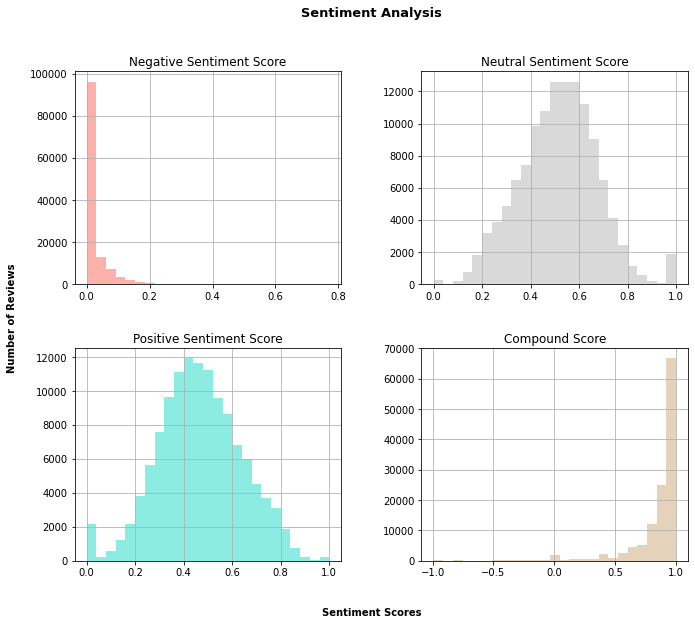

In [18]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(11,9))

# plot all 4 histograms
reviews_en.hist('neg', bins=25, ax=axes[0,0], color='salmon', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
reviews_en.hist('neu', bins=25, ax=axes[0,1], color='silver', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
reviews_en.hist('pos', bins=25, ax=axes[1,0], color='turquoise', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
reviews_en.hist('compound_score', bins=25, ax=axes[1,1], color='tan', alpha=0.6)
axes[1,1].set_title('Compound Score')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis\n\n', fontsize=13, fontweight='bold');

In [22]:
## Divide into negative/positive sentiment
reviews_en['sentiment_type'] = reviews_en['compound_score'].apply(lambda x: 'pos' if x >=0 else 'neg')
reviews_en[['comments', 'compound_score', 'sentiment_type']].head()

<ipython-input-22-e25d18cd3c9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_en['sentiment_type'] = reviews_en['compound_score'].apply(lambda x: 'pos' if x >=0 else 'neg')


,comments,compound_score,sentiment_type
0,stay à lot better expected one word wonderful house big spacious also nicely decorated location ...,0.9839,pos
1,absolutely delightful place stay hostess incredibly welcoming friendly two amplesized bedrooms u...,0.9563,pos
2,boyfriend stayed stefanias place october absolutely great stefania amazing host always made sure...,0.9824,pos
3,nice place visit malta house comfortable tastefully decorated comfortable stefania great host ev...,0.9639,pos
5,brilliant vacation using airbnb looking clean comfortable room good location nice host stefanias...,0.9939,pos


In [ ]:
## take a look at scores rating
reviews_en = pd.merge(reviews_en, listings[['review_scores_rating', 'id']], how = 'left', left_on=  ["listing_id"], right_on = ['id']) 
reviews_en = reviews_en.rename(columns={'id_x' : 'id_review'})

In [19]:
## top positive sentiment reviews (filter more than 5 words)
pos_review = reviews_en[reviews_en.sentiment_type == 'pos']
pos_review[pos_review ["words"] >= 5].sort_values('compound_score', ascending = False)[["comments", "compound_score"]].head(10)

,comments,compound_score
118443,stayed stephanies apartment july stephanie che...,0.9995
28421,dont know start place amazing saying slowmotio...,0.9995
60280,anyone would lucky get stay beautiful authenti...,0.9994
16005,back reality perfect stay jayne tonys little e...,0.9994
31690,yr old traditional maltese farmhouse fully equ...,0.9992
18202,airbnbs housesand real homes wasnt great airbn...,0.9992
119240,stay lovely house refugio one word perfect hon...,0.9992
83928,pleasure staying alexieis home made family wel...,0.9992
23590,returned wonderful holiday gozo family spent w...,0.9991
119113,stefania paolos hospitality went beyond superh...,0.9990


In [20]:
## top negative sentiment reviews (filter more than 5 words)
neg_review = reviews_en[reviews_en.sentiment_type == 'neg']
columns = neg_review.columns
neg_review = neg_review .reindex(columns=columns)
neg_review[neg_review ["words"] >= 5].sort_values('compound_score', ascending = True)[["comments", "compound_score"]].head(10)

,comments,compound_score
82029,guests beware appalling state property mouldy ...,-0.9915
84584,hate write negative review apartment lovely ho...,-0.9876
12384,warning bad experience recommended parking car...,-0.9875
67558,damn first airbnb experience hell sometimes re...,-0.9869
70317,bad experience left morning checkin due hosts ...,-0.9847
3826,group ladies staying place aged added brief po...,-0.9837
66790,disappointing modern apartment several years o...,-0.9836
39007,photos air bb apartment reality actually livin...,-0.9833
33836,house potential amazing time stay simply wasnt...,-0.9830
2271,dirty full flies first went buy cleaning stuff...,-0.9819


In [22]:
## compare the length of pos/neg comments
pos_review['comm_length'] = pos_review['comments'].apply(len)
neg_review['comm_length'] = neg_review['comments'].apply(len)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


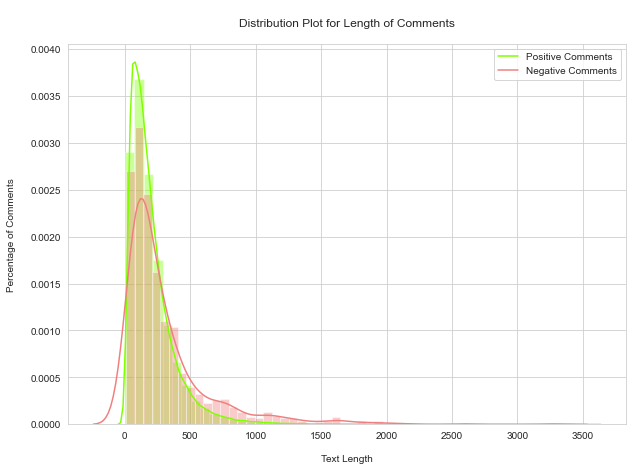

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))

sns.distplot(pos_review['comm_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(neg_review['comm_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

In [25]:
123267/124407 ## 99% positive

0.9908365284911621

In [26]:
## TextBlob
from textblob import TextBlob
example = TextBlob(pos_review.comments[1])
print(example)
print(example.sentiment.polarity) ## 0.395 vs. 0.98


absolutely delightful place stay hostess incredibly welcoming friendly two amplesized bedrooms upstairs two bathrooms kitchenliving area private outdoor balcony charm old sliema villa stefania lives downstairs part house self contained would recommend definitely return
0.3958333333333333


In [207]:
example_neg = TextBlob("unfortunately description listing wasnt accurate apartment wasnt brand new windows decades ago beds mattresses used sofa old used blinds single window apartment old broken making impossible roll let light finally water low pressure shower taking ages washing dishes dreadful pictures attached listing purposefully omit inconvenient aspects apartment present good lightbrbrregarding cleanliness overall state flat far clean mould one mattress mould shower blankets washed arrival smelled old dirty surfaces apartment sticky especially kitchen main room wasnt enough th evening found giant cockroaches inside apartment living cupboards informed host apparently cockroaches normal malta host suggested getting spray deal also stayed apartment burst apartment rain water coming window apartment window closed informed host didnt get response elderly couple looks came time assess situation apparently nothing done wall completely dries replaster hole window couple said would contact host resolve issue since nothing donebrbrneedless say worst experience airbnb ruined good part vacation unbelievable many people left positive opinion place")
print(example_neg)
print(example_neg.sentiment.polarity) ## -0.024 vs. -0.078

unfortunately description listing wasnt accurate apartment wasnt brand new windows decades ago beds mattresses used sofa old used blinds single window apartment old broken making impossible roll let light finally water low pressure shower taking ages washing dishes dreadful pictures attached listing purposefully omit inconvenient aspects apartment present good lightbrbrregarding cleanliness overall state flat far clean mould one mattress mould shower blankets washed arrival smelled old dirty surfaces apartment sticky especially kitchen main room wasnt enough th evening found giant cockroaches inside apartment living cupboards informed host apparently cockroaches normal malta host suggested getting spray deal also stayed apartment burst apartment rain water coming window apartment window closed informed host didnt get response elderly couple looks came time assess situation apparently nothing done wall completely dries replaster hole window couple said would contact host resolve issue s

In [208]:
## classified as negative with -0.1531 by VADER NLTK
example_comm = "everything greatbrperfect location really close main bus stops convenience store nearby" 
example_comm = TextBlob(example_comm)
print(example_comm)
print(example_comm.sentiment.polarity) ## 0.18

everything greatbrperfect location really close main bus stops convenience store nearby
0.18333333333333335


In [27]:
## textblob vs. vader
reviews_sent = reviews_en.copy()
reviews_sent['textblob_score']  = reviews_sent['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

reviews_sent[['comments', 'compound_score', 'textblob_score']].head()


,comments,compound_score,textblob_score
0,stay à lot better expected one word wonderful house big spacious also nicely decorated location ...,0.9839,0.527273
1,absolutely delightful place stay hostess incredibly welcoming friendly two amplesized bedrooms u...,0.9563,0.395833
2,boyfriend stayed stefanias place october absolutely great stefania amazing host always made sure...,0.9824,0.650000
3,nice place visit malta house comfortable tastefully decorated comfortable stefania great host ev...,0.9639,0.520000
5,brilliant vacation using airbnb looking clean comfortable room good location nice host stefanias...,0.9939,0.301555


In [30]:
reviews_sent['comp_flag'] = reviews_sent['compound_score'] * reviews_sent['textblob_score']
reviews_sent['comp_flag_fin'] = reviews_sent['comp_flag'].apply(lambda x: 1 if x < 0 else 0)

print(reviews_sent.comp_flag_fin.value_counts()) ## 1141 score differences

0    123265
1      1142
Name: comp_flag_fin, dtype: int64


In [31]:
## take a look at score differences
comp_score_tbl = reviews_sent[['comments','compound_score', 'textblob_score', 'comp_flag_fin']].copy()
comp_score_tbl = comp_score_tbl.loc[comp_score_tbl['comp_flag_fin'] == 1]

In [32]:
## widen the column length
pd.set_option('display.max_colwidth', 120)

comp_score_tbl.head(15)

,comments,compound_score,textblob_score,comp_flag_fin
153,needs much considered flat flat room oven side sleep eat food bought outside table thats next bed two things use roo...,-0.7028,0.073210,1
485,albert wife welcoming hosts go eyes closed,0.4404,-0.100000,1
811,skeptical accomodation airconditioned bedrooms cool fan even though stay august,0.3182,-0.075000,1
879,apartment close port well centre bugibba many buses going beaches parts malta room air conditioning small balcony wi...,-0.2434,0.125000,1
883,gotta fair accurate disappointed location great apartment spacious well equipped however state room standard cleanli...,-0.1280,0.047917,1
904,really beautiful apartment photos dont justice claire wonderful host couldnt ask better great location easy trip via...,-0.3559,0.524074,1
1364,location location location couldnt better nice flat space heater bedroom nice touch id definitely stay benes pad,-0.5220,0.335000,1
1504,beautifull appartment top host min walk airport bus stop around corner,-0.1027,0.500000,1
1508,emanuels place near malta airport responsive every querry offers assitance well sorry decline farewell breakfast alr...,0.5106,-0.075000,1
1666,standards way exceeded expected would definitely recommend,0.6369,-0.050000,1


In [3]:
#reviews_en = pd.read_csv('./reviews_en.csv')
#reviews_en.drop(['Unnamed: 0'], axis = 1, inplace  = True)

0    123267
1      1140
Name: sentiment_flg, dtype: int64